In [1]:
!pip install sqlalchemy

In [2]:
!pip install tomli

In [3]:
!pip install psycopg2-binary

In [4]:
!pip install sentence-transformers umap-learn

Cell 1 – imports & config

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys



# project root = parent of the notebooks folder
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

from src.data.loader import load_jobs


plt.rcParams["figure.figsize"] = (10, 5)
sns.set()


In [6]:
import pandas as pd

def load_jobs(limit=None):
    data = [
        {
            "id": 1,
            "title": "Data Scientist",
            "company": "TechCorp",
            "location": "New York, NY",
            "description": "Build machine learning models for job posting analytics.",
        },
        {
            "id": 2,
            "title": "Machine Learning Engineer",
            "company": "AI Labs",
            "location": "San Francisco, CA",
            "description": "Deploy NLP pipelines for labor market data.",
        },
        {
            "id": 3,
            "title": "NLP Researcher",
            "company": "DeepText",
            "location": "Remote",
            "description": "Research embeddings and clustering for job descriptions.",
        },
        {
            "id": 4,
            "title": "Data Analyst",
            "company": "InsightWorks",
            "location": "Chicago, IL",
            "description": "Analyze job posting trends and create dashboards.",
        },
    ]
    df = pd.DataFrame(data)
    if limit is not None:
        return df.head(limit)
    return df


Cell 2 – load a sample of jobs

In [7]:
jobs = load_jobs(limit=20000)  # or None for all
jobs.head()


,id,title,company,location,description
0,1,Data Scientist,TechCorp,"New York, NY",Build machine learning models for job posting ...
1,2,Machine Learning Engineer,AI Labs,"San Francisco, CA",Deploy NLP pipelines for labor market data.
2,3,NLP Researcher,DeepText,Remote,Research embeddings and clustering for job des...
3,4,Data Analyst,InsightWorks,"Chicago, IL",Analyze job posting trends and create dashboards.


Cell 3 – basic info

In [8]:
jobs.info()
jobs.describe(include="all").transpose().head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           4 non-null      int64 
 1   title        4 non-null      object
 2   company      4 non-null      object
 3   location     4 non-null      object
 4   description  4 non-null      object
dtypes: int64(1), object(4)
memory usage: 292.0+ bytes


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,4.0,NaN,NaN,NaN,2.5,1.290994,1.0,1.75,2.5,3.25,4.0
title,4,4,Data Scientist,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company,4,4,TechCorp,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,4,4,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,4,4,Build machine learning models for job posting ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cell 4 – text length distribution

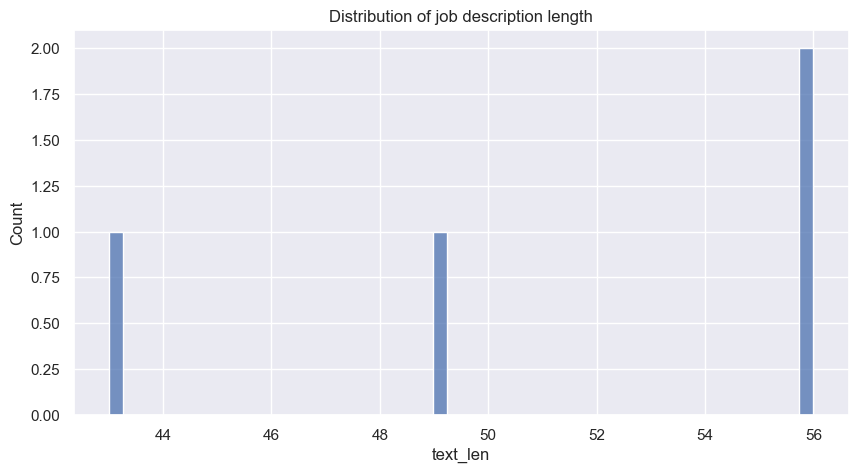

In [9]:
text_col = "description"  # adjust if needed

jobs["text_len"] = jobs[text_col].astype(str).str.len()

jobs["text_len"].describe()
sns.histplot(jobs["text_len"], bins=50)
plt.title("Distribution of job description length")
plt.show()


Cell 5 – top job titles / locations

In [10]:
if "title" in jobs.columns:
    display(jobs["title"].value_counts().head(20))

if "city" in jobs.columns:
    display(jobs["city"].value_counts().head(20))


title
Data Scientist               1
Machine Learning Engineer    1
NLP Researcher               1
Data Analyst                 1
Name: count, dtype: int64

Cell 6 – quick embedding + scatter (optional)

If you want a very simple demo for the client:

Batches: 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]
c:\Users\hisuk\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\hisuk\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


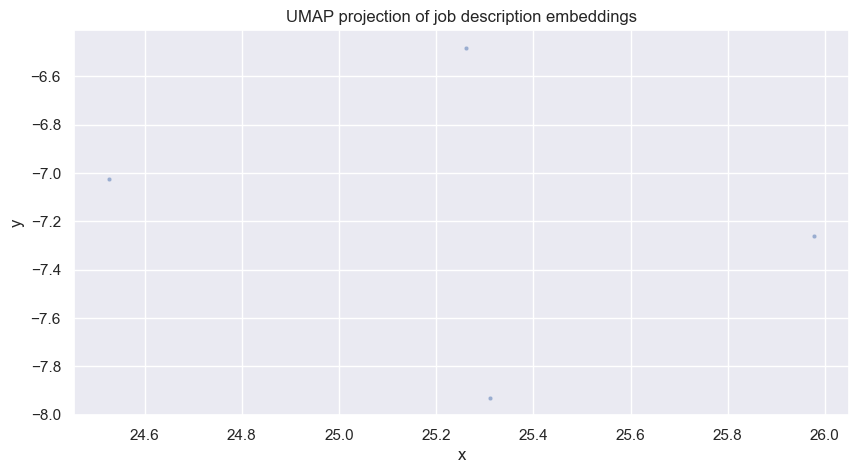

In [12]:
from sentence_transformers import SentenceTransformer
import umap

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# pick a text column name you actually have, e.g. "description"
text_col = "description"  

n = min(len(jobs), 2000)
sample = jobs.sample(n, random_state=42)

emb = model.encode(sample[text_col].tolist(), show_progress_bar=True)

reducer = umap.UMAP(random_state=42)
emb_2d = reducer.fit_transform(emb)

sample["x"] = emb_2d[:, 0]
sample["y"] = emb_2d[:, 1]

sns.scatterplot(
    data=sample,
    x="x",
    y="y",
    alpha=0.5,
    s=10,
)
plt.title("UMAP projection of job description embeddings")
plt.show()

